In [1]:
versioninfo()

Julia Version 1.10.2
Commit bd47eca2c8 (2024-03-01 10:14 UTC)
Build Info:
  Official https://julialang.org/ release
Platform Info:
  OS: Windows (x86_64-w64-mingw32)
  CPU: 6 × AMD Ryzen 5 4500U with Radeon Graphics         
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-15.0.7 (ORCJIT, znver2)
Threads: 1 default, 0 interactive, 1 GC (on 6 virtual cores)
Environment:
  JULIA_NUM_THREADS = 


In [1]:
import Pkg
Pkg.add("SDDP")
Pkg.add("HiGHS")
Pkg.add("Plots")

    Updating registry at `C:\Users\matsz\.julia\registries\General.toml`
   Resolving package versions...
  No Changes to `C:\Users\matsz\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\matsz\.julia\environments\v1.10\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\matsz\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\matsz\.julia\environments\v1.10\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\matsz\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\matsz\.julia\environments\v1.10\Manifest.toml`


In [1]:
using SDDP, HiGHS, Statistics, DataFrames, Plots, XLSX

In [3]:
module Temp
    struct GoalsData3
        minimum_limit:: Vector{Float64}
        acceptable_limit:: Vector{Float64}
        desired_limit::Vector{Float64}
        inflows:: Vector{Int64}
        minimum_utility:: Vector{Float32}
        acceptable_utility:: Vector{Float32}
        desired_utility:: Vector{Float32}
        above_desired_utility:: Vector{Float32}
        initial_wealth:: Int64
        provision:: Float32
    end
end

Main.Temp

In [52]:
data_source = DataFrame(XLSX.readtable("./goal_data.xlsx", "goal_data")) 
data = data_source[1:13,:]

Row,t,minimum_limit,acceptable_limit,desired_limit,inflows,minimum_utility,acceptable_utility,desired_utility,above_desired_utility
,Any,Any,Any,Any,Any,Any,Any,Any,Any
1,1,6,8,9,0,0.694444,0.416667,0.166667,0.001
2,2,6,8,9,10,0.694444,0.416667,0.166667,0.001
3,3,6,8,9,10,0.694444,0.416667,0.166667,0.001
4,4,6,8,9,10,0.694444,0.416667,0.166667,0.001
5,5,6,8,9,10,0.694444,0.416667,0.166667,0.001
6,6,6,8,9,10,0.694444,0.416667,0.166667,0.001
7,7,56,98,109,10,0.46875,0.125,0.0954545,0.001
8,8,6,8,9,10,0.694444,0.416667,0.166667,0.001
9,9,6,8,9,10,0.694444,0.416667,0.166667,0.001


In [105]:
model_data = Temp.GoalsData3(
    data.minimum_limit,
    data.acceptable_limit,
    data.desired_limit,
    data.inflows,
    data.minimum_utility,
    data.acceptable_utility,
    data.desired_utility,
    data.above_desired_utility,
    140,
    0.0029
    )


Main.Temp.GoalsData3([6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 56.0, 6.0, 6.0, 6.0, 6.0, 6.0, 81.0], [8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 98.0, 8.0, 8.0, 8.0, 8.0, 8.0, 143.0], [9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 109.0, 9.0, 9.0, 9.0, 9.0, 9.0, 159.0], [0, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10], Float32[0.6944444, 0.6944444, 0.6944444, 0.6944444, 0.6944444, 0.6944444, 0.46875, 0.6944444, 0.6944444, 0.6944444, 0.6944444, 0.6944444, 0.32407406], Float32[0.41666666, 0.41666666, 0.41666666, 0.41666666, 0.41666666, 0.41666666, 0.125, 0.41666666, 0.41666666, 0.41666666, 0.41666666, 0.41666666, 0.08467742], Float32[0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.095454544, 0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.065625], Float32[0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001], 140, 0.0029f0)

In [186]:
graph3 = SDDP.MarkovianGraph(
    Array{Float64,2}[
        [1.0]',
        [0.1065 0.787 0.1065],
        [0.1065 0.787 0.1065; 0.1065 0.787 0.1065; 0.1065 0.787 0.1065],
        [0.1065 0.787 0.1065; 0.1065 0.787 0.1065; 0.1065 0.787 0.1065],
        [0.1065 0.787 0.1065; 0.1065 0.787 0.1065; 0.1065 0.787 0.1065],
        [0.1065 0.787 0.1065; 0.1065 0.787 0.1065; 0.1065 0.787 0.1065],
        [0.1065 0.787 0.1065; 0.1065 0.787 0.1065; 0.1065 0.787 0.1065],
        [0.1065 0.787 0.1065; 0.1065 0.787 0.1065; 0.1065 0.787 0.1065],
        [0.1065 0.787 0.1065; 0.1065 0.787 0.1065; 0.1065 0.787 0.1065],
        [0.1065 0.787 0.1065; 0.1065 0.787 0.1065; 0.1065 0.787 0.1065],
        [0.1065 0.787 0.1065; 0.1065 0.787 0.1065; 0.1065 0.787 0.1065],
        [0.1065 0.787 0.1065; 0.1065 0.787 0.1065; 0.1065 0.787 0.1065],
        [0.1065 0.787 0.1065; 0.1065 0.787 0.1065; 0.1065 0.787 0.1065]                             
                              
    ]            
)

Root
 (0, 1)
Nodes
 (1, 1)
 (2, 1)
 (2, 2)
 (2, 3)
 (3, 1)
 (3, 2)
 (3, 3)
 (4, 1)
 (4, 2)
 (4, 3)
 (5, 1)
 (5, 2)
 (5, 3)
 (6, 1)
 (6, 2)
 (6, 3)
 (7, 1)
 (7, 2)
 (7, 3)
 (8, 1)
 (8, 2)
 (8, 3)
 (9, 1)
 (9, 2)
 (9, 3)
 (10, 1)
 (10, 2)
 (10, 3)
 (11, 1)
 (11, 2)
 (11, 3)
 (12, 1)
 (12, 2)
 (12, 3)
 (13, 1)
 (13, 2)
 (13, 3)
Arcs
 (0, 1) => (1, 1) w.p. 1.0
 (1, 1) => (2, 1) w.p. 0.1065
 (1, 1) => (2, 2) w.p. 0.787
 (1, 1) => (2, 3) w.p. 0.1065
 (2, 1) => (3, 1) w.p. 0.1065
 (2, 1) => (3, 2) w.p. 0.787
 (2, 1) => (3, 3) w.p. 0.1065
 (2, 2) => (3, 1) w.p. 0.1065
 (2, 2) => (3, 2) w.p. 0.787
 (2, 2) => (3, 3) w.p. 0.1065
 (2, 3) => (3, 1) w.p. 0.1065
 (2, 3) => (3, 2) w.p. 0.787
 (2, 3) => (3, 3) w.p. 0.1065
 (3, 1) => (4, 1) w.p. 0.1065
 (3, 1) => (4, 2) w.p. 0.787
 (3, 1) => (4, 3) w.p. 0.1065
 (3, 2) => (4, 1) w.p. 0.1065
 (3, 2) => (4, 2) w.p. 0.787
 (3, 2) => (4, 3) w.p. 0.1065
 (3, 3) => (4, 1) w.p. 0.1065
 (3, 3) => (4, 2) w.p. 0.787
 (3, 3) => (4, 3) w.p. 0.1065
 (4, 1) => (5, 1) 

In [189]:
fill([0.0198 0.1751 0.4368 0.3073 0.061], (4,5))

4×5 Matrix{Matrix{Float64}}:
 [0.0198 0.1751 … 0.3073 0.061]  …  [0.0198 0.1751 … 0.3073 0.061]
 [0.0198 0.1751 … 0.3073 0.061]     [0.0198 0.1751 … 0.3073 0.061]
 [0.0198 0.1751 … 0.3073 0.061]     [0.0198 0.1751 … 0.3073 0.061]
 [0.0198 0.1751 … 0.3073 0.061]     [0.0198 0.1751 … 0.3073 0.061]

In [191]:
graph5 = graph3 = SDDP.MarkovianGraph(
    Array{Float64,2}[
        [1.0]',
        [0.0198 0.1751 0.4368 0.3073 0.061],
        [0.0198 0.1751 0.4368 0.3073 0.061; 0.0198 0.1751 0.4368 0.3073 0.061; 0.0198 0.1751 0.4368 0.3073 0.061; 0.0198 0.1751 0.4368 0.3073 0.061; 0.0198 0.1751 0.4368 0.3073 0.061],
        [0.0198 0.1751 0.4368 0.3073 0.061; 0.0198 0.1751 0.4368 0.3073 0.061; 0.0198 0.1751 0.4368 0.3073 0.061; 0.0198 0.1751 0.4368 0.3073 0.061; 0.0198 0.1751 0.4368 0.3073 0.061],
        [0.0198 0.1751 0.4368 0.3073 0.061; 0.0198 0.1751 0.4368 0.3073 0.061; 0.0198 0.1751 0.4368 0.3073 0.061; 0.0198 0.1751 0.4368 0.3073 0.061; 0.0198 0.1751 0.4368 0.3073 0.061],
        [0.0198 0.1751 0.4368 0.3073 0.061; 0.0198 0.1751 0.4368 0.3073 0.061; 0.0198 0.1751 0.4368 0.3073 0.061; 0.0198 0.1751 0.4368 0.3073 0.061; 0.0198 0.1751 0.4368 0.3073 0.061],
        [0.0198 0.1751 0.4368 0.3073 0.061; 0.0198 0.1751 0.4368 0.3073 0.061; 0.0198 0.1751 0.4368 0.3073 0.061; 0.0198 0.1751 0.4368 0.3073 0.061; 0.0198 0.1751 0.4368 0.3073 0.061],
        [0.0198 0.1751 0.4368 0.3073 0.061; 0.0198 0.1751 0.4368 0.3073 0.061; 0.0198 0.1751 0.4368 0.3073 0.061; 0.0198 0.1751 0.4368 0.3073 0.061; 0.0198 0.1751 0.4368 0.3073 0.061],
        [0.0198 0.1751 0.4368 0.3073 0.061; 0.0198 0.1751 0.4368 0.3073 0.061; 0.0198 0.1751 0.4368 0.3073 0.061; 0.0198 0.1751 0.4368 0.3073 0.061; 0.0198 0.1751 0.4368 0.3073 0.061],
        [0.0198 0.1751 0.4368 0.3073 0.061; 0.0198 0.1751 0.4368 0.3073 0.061; 0.0198 0.1751 0.4368 0.3073 0.061; 0.0198 0.1751 0.4368 0.3073 0.061; 0.0198 0.1751 0.4368 0.3073 0.061],
        [0.0198 0.1751 0.4368 0.3073 0.061; 0.0198 0.1751 0.4368 0.3073 0.061; 0.0198 0.1751 0.4368 0.3073 0.061; 0.0198 0.1751 0.4368 0.3073 0.061; 0.0198 0.1751 0.4368 0.3073 0.061],
        [0.0198 0.1751 0.4368 0.3073 0.061; 0.0198 0.1751 0.4368 0.3073 0.061; 0.0198 0.1751 0.4368 0.3073 0.061; 0.0198 0.1751 0.4368 0.3073 0.061; 0.0198 0.1751 0.4368 0.3073 0.061],
        [0.0198 0.1751 0.4368 0.3073 0.061; 0.0198 0.1751 0.4368 0.3073 0.061; 0.0198 0.1751 0.4368 0.3073 0.061; 0.0198 0.1751 0.4368 0.3073 0.061; 0.0198 0.1751 0.4368 0.3073 0.061],
                                     
                              
    ]            
)

Root
 (0, 1)
Nodes
 (1, 1)
 (2, 1)
 (2, 2)
 (2, 3)
 (2, 4)
 (2, 5)
 (3, 1)
 (3, 2)
 (3, 3)
 (3, 4)
 (3, 5)
 (4, 1)
 (4, 2)
 (4, 3)
 (4, 4)
 (4, 5)
 (5, 1)
 (5, 2)
 (5, 3)
 (5, 4)
 (5, 5)
 (6, 1)
 (6, 2)
 (6, 3)
 (6, 4)
 (6, 5)
 (7, 1)
 (7, 2)
 (7, 3)
 (7, 4)
 (7, 5)
 (8, 1)
 (8, 2)
 (8, 3)
 (8, 4)
 (8, 5)
 (9, 1)
 (9, 2)
 (9, 3)
 (9, 4)
 (9, 5)
 (10, 1)
 (10, 2)
 (10, 3)
 (10, 4)
 (10, 5)
 (11, 1)
 (11, 2)
 (11, 3)
 (11, 4)
 (11, 5)
 (12, 1)
 (12, 2)
 (12, 3)
 (12, 4)
 (12, 5)
 (13, 1)
 (13, 2)
 (13, 3)
 (13, 4)
 (13, 5)
Arcs
 (0, 1) => (1, 1) w.p. 1.0
 (1, 1) => (2, 1) w.p. 0.0198
 (1, 1) => (2, 2) w.p. 0.1751
 (1, 1) => (2, 3) w.p. 0.4368
 (1, 1) => (2, 4) w.p. 0.3073
 (1, 1) => (2, 5) w.p. 0.061
 (2, 1) => (3, 1) w.p. 0.0198
 (2, 1) => (3, 2) w.p. 0.1751
 (2, 1) => (3, 3) w.p. 0.4368
 (2, 1) => (3, 4) w.p. 0.3073
 (2, 1) => (3, 5) w.p. 0.061
 (2, 2) => (3, 1) w.p. 0.0198
 (2, 2) => (3, 2) w.p. 0.1751
 (2, 2) => (3, 3) w.p. 0.4368
 (2, 2) => (3, 4) w.p. 0.3073
 (2, 2) => (3, 5) w.p. 

In [192]:
function asset_management_alm(data:: Temp.GoalsData3)
  
    model = SDDP.PolicyGraph(
        graph3,
        lower_bound = -126,
        optimizer = HiGHS.Optimizer,
    ) do subproblem, index
        (stage, markov_state) = index
        r_stock = [0.77 0.89 1.04 1.2 1.4]
        r_bonds = [1.04]
        @variable(subproblem, stocks >= 0, SDDP.State, initial_value = 0.0)
        @variable(subproblem, bonds >= 0, SDDP.State, initial_value = 0.0)

        @variable(subproblem, bonds_buy >= 0)
        @variable(subproblem, bonds_sell >= 0)
        @variable(subproblem, stocks_buy >= 0)
        @variable(subproblem, stocks_sell >= 0)                     
         
        
        @variable(subproblem, consumption >=0)
        
        @variable(subproblem, 0 <= minimum<= data.minimum_limit[stage])
        @variable(subproblem, 0 <= acceptable <= data.acceptable_limit[stage] - data.minimum_limit[stage])
        @variable(subproblem, 0 <= desired <= data.desired_limit[stage] - data.acceptable_limit[stage])
        @variable(subproblem, 0 <= above_desired)
        @constraint(subproblem, minimum + acceptable + desired + above_desired == consumption)
                     
        if stage == 1
            @constraint(subproblem, bonds_buy - bonds_sell == bonds.out)
            @constraint(subproblem, stocks_buy - stocks_sell == stocks.out)
            @constraint(subproblem, stocks_buy*(1+data.provision) + bonds_buy*(1+data.provision) + consumption == data.initial_wealth) 
                                           
            @stageobjective(subproblem, -(data.minimum_utility[stage] * minimum + data.acceptable_utility[stage] * acceptable + data.desired_utility[stage] * desired + data.above_desired_utility[stage] * above_desired))
            
        elseif 1 < stage 
            @constraint(
                subproblem,
                r_stock[markov_state] * stocks.in + stocks_buy - stocks_sell== stocks.out)

            @constraint(
                subproblem,
                r_bonds[1] * bonds.in + bonds_buy - bonds_sell== bonds.out)

            @constraint(subproblem, stocks_buy*(1+data.provision) - stocks_sell*(1+data.provision) + bonds_buy*(1+data.provision) - bonds_sell*(1+data.provision) + consumption - data.inflows[stage] == 0) 

            @stageobjective(subproblem, -(data.minimum_utility[stage] * minimum + data.acceptable_utility[stage] * acceptable + data.desired_utility[stage] * desired + data.above_desired_utility[stage] * above_desired))
        
        end
    end
    SDDP.train(model; iteration_limit = 1000, log_frequency = 50)
    
   #@test SDDP.calculate_bound(model) ≈ 1.514 atol = 1e-4
    return model
end

model = asset_management_alm(model_data)


-------------------------------------------------------------------
         SDDP.jl (c) Oscar Dowson and contributors, 2017-23
-------------------------------------------------------------------
problem
  nodes           : 61
  state variables : 2
  scenarios       : 2.44141e+08
  existing cuts   : false
options
  solver          : serial mode
  risk measure    : SDDP.Expectation()
  sampling scheme : SDDP.InSampleMonteCarlo
subproblem structure
  VariableRef                             : [14, 14]
  AffExpr in MOI.EqualTo{Float64}         : [4, 4]
  VariableRef in MOI.GreaterThan{Float64} : [12, 12]
  VariableRef in MOI.LessThan{Float64}    : [3, 4]
numerical stability report
  matrix range     [8e-01, 1e+00]
  objective range  [1e-03, 1e+00]
  bounds range     [1e+00, 1e+02]
  rhs range        [1e+01, 1e+02]
-------------------------------------------------------------------
 iteration    simulation      bound        time (s)     solves  pid
------------------------------------------

A policy graph with 61 nodes.
 Node indices: (1, 1), ..., (13, 5)


In [193]:
simulations = SDDP.simulate(
    # The trained model to simulate.
    model,
    # The number of replications.
    2000,
    # A list of names to record the values of.
    [:stocks, :bonds, :minimum, :acceptable, :desired, :above_desired, :consumption],
    skip_undefined_variables=true
)

println("Lower bounds", SDDP.calculate_bound(model))

objectives = map(simulations) do simulation
    return sum(stage[:stage_objective] for stage in simulation)
end

μ, ci = SDDP.confidence_interval(objectives)
println("Confidence interval: ", μ, " ± ", ci)

Lower bounds-120.4309993237172
Confidence interval: -120.45306604856688 ± 0.12364296290360006


In [153]:
plt = SDDP.SpaghettiPlot(simulations)

SDDP.add_spaghetti(plt; title = "Stocks") do data
    return data[:stocks].out
end

SDDP.plot(plt)


In [91]:
plt = SDDP.SpaghettiPlot(simulations)

SDDP.add_spaghetti(plt; title = "Consumption") do data
    return data[:consumption]
end

SDDP.plot(plt)

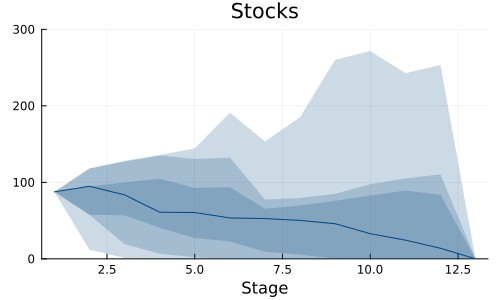

In [194]:
import Plots

Plots.plot(
    SDDP.publication_plot(simulations, title = "Stocks") do data
        return data[:stocks].out
    end,
  #  SDDP.publication_plot(simulations, title = "Bonds") do data
  #      return data[:bonds]
  #  end;
    xlabel = "Stage",
    ylims = (0, 300),
    layout = (1, 2),
)

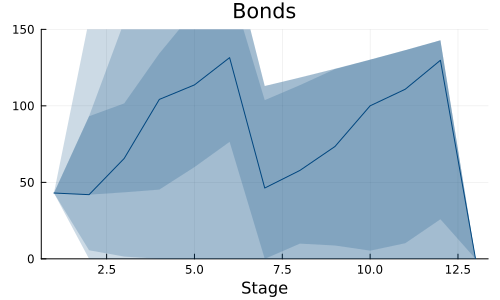

In [195]:
Plots.plot(
    SDDP.publication_plot(simulations, title = "Bonds") do data
        return data[:bonds].out
    end,
  #  SDDP.publication_plot(simulations, title = "Bonds") do data
  #      return data[:bonds]
  #  end;
    xlabel = "Stage",
    ylims = (0, 150),
    layout = (1, 2),
)

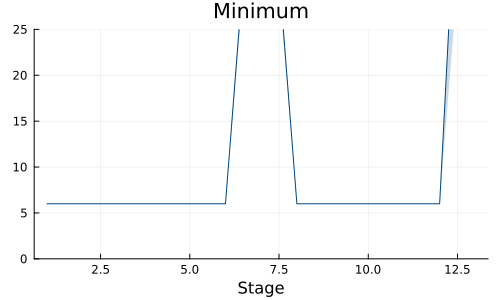

In [196]:
Plots.plot(
    SDDP.publication_plot(simulations, title = "Minimum") do data
        return data[:minimum]
    end,
  #  SDDP.publication_plot(simulations, title = "Bonds") do data
  #      return data[:bonds]
  #  end;
    xlabel = "Stage",
    ylims = (0, 25),
    layout = (1, 2),
)

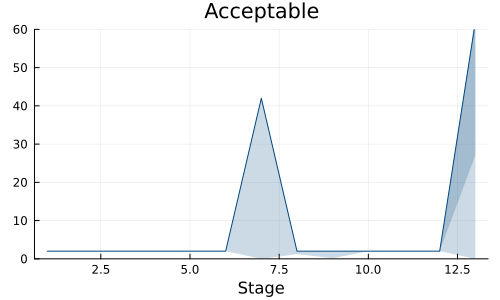

In [197]:
Plots.plot(
    SDDP.publication_plot(simulations, title = "Acceptable") do data
        return data[:acceptable]
    end,
  #  SDDP.publication_plot(simulations, title = "Bonds") do data
  #      return data[:bonds]
  #  end;
    xlabel = "Stage",
    ylims = (0, 60),
    layout = (1, 2),
)

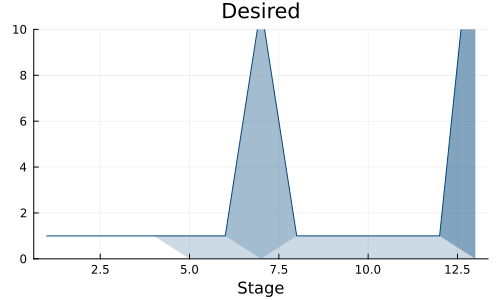

In [198]:
Plots.plot(
    SDDP.publication_plot(simulations, title = "Desired") do data
        return data[:desired]
    end,
  #  SDDP.publication_plot(simulations, title = "Bonds") do data
  #      return data[:bonds]
  #  end;
    xlabel = "Stage",
    ylims = (0, 10),
    layout = (1, 2),
)

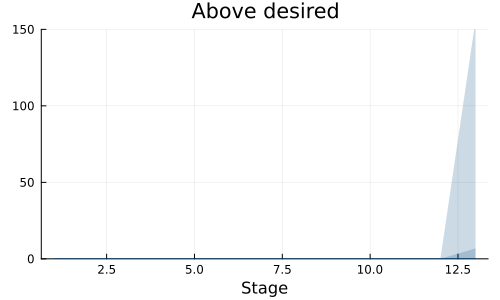

In [199]:
Plots.plot(
    SDDP.publication_plot(simulations, title = "Above desired") do data
        return data[:above_desired]
    end,
  #  SDDP.publication_plot(simulations, title = "Bonds") do data
  #      return data[:bonds]
  #  end;
    xlabel = "Stage",
    ylims = (0, 150),
    layout = (1, 2),
)

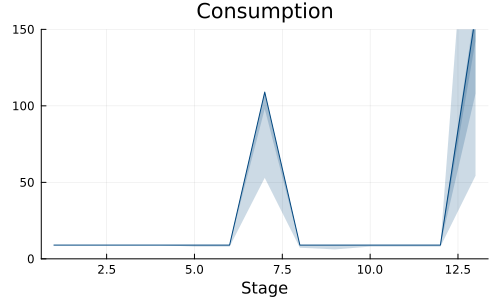

In [200]:
Plots.plot(
    SDDP.publication_plot(simulations, title = "Consumption") do data
        return data[:consumption]
    end,
  #  SDDP.publication_plot(simulations, title = "Bonds") do data
  #      return data[:bonds]
  #  end;
    xlabel = "Stage",
    ylims = (0, 150),
    layout = (1, 2),
)

In [201]:
n_scenarios = 2000
n_stages = 13
bonds = zeros(n_scenarios,n_stages)
stocks = zeros(n_scenarios,n_stages)
consumption = zeros(n_scenarios,n_stages)

for (i, scenario) in enumerate(simulations)
    bonds[i,:] = [node[:bonds].out for node in scenario]
    stocks[i,:] = [node[:stocks].out for node in scenario]
    consumption[i,:] = [node[:consumption] for node in scenario]
end

bonds_perc = zeros(5,n_stages)

for t in 1:n_stages
    bonds_perc[:,t] = quantile(bonds[:,t], [0.05, 0.25, 0.5, 0.75, 0.95])
end

stocks_perc = zeros(5,n_stages)

for t in 1:n_stages
    stocks_perc[:,t] = quantile(stocks[:,t], [0.05, 0.25, 0.5, 0.75, 0.95])
end

Row,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,130.621,123.704,118.666,117.408,121.888,127.273,64.5162,68.094,71.0969,74.466,76.9957,77.8425,0.0
2,130.621,136.843,143.314,150.044,159.895,170.91,80.3472,90.6242,96.2048,104.498,111.611,121.924,0.0
3,130.621,136.843,149.245,165.202,173.919,186.071,100.293,108.264,117.856,126.703,136.399,142.855,0.0
4,130.621,150.858,158.496,174.793,189.106,200.567,112.941,118.494,124.23,130.197,136.402,142.856,0.0
5,130.621,168.377,177.474,186.313,194.84,204.198,115.087,122.669,130.01,136.791,146.281,155.035,0.0


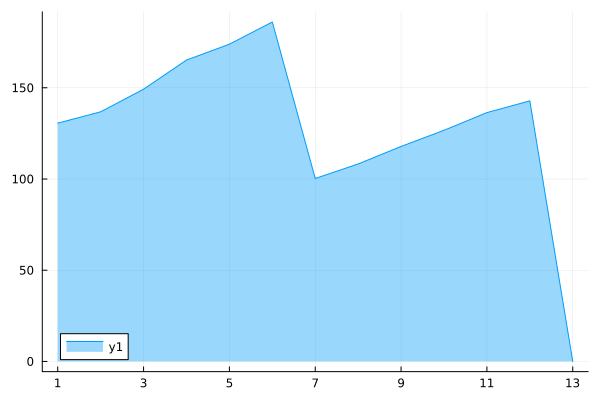

In [202]:
wealth = stocks .+ bonds

wealth_perc = zeros(5,n_stages)

for t in 1:n_stages
    wealth_perc[:,t] = quantile(wealth[:,t], [0.05, 0.25, 0.5, 0.75, 0.95])
end


display(DataFrame(wealth_perc, :auto))

areaplot(wealth_perc[3,:], fillalpha=0.4, xticks=1:2:n_stages)


Row,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.670595,0.0710238,0.0271989,0.00598017,8.88586e-5,3.5082e-6,1.84251e-7,4.0629e-11,0.0,0.0,0.0,-3.11557e-12,0.0
2,0.670595,0.382038,0.358858,0.231888,0.143637,0.11331,0.0827353,0.0458589,0.0017473,0.00022855,1.68037e-5,2.26399e-9,0.0
3,0.670595,0.693414,0.560208,0.369145,0.346242,0.289064,0.536817,0.466484,0.387034,0.244407,0.190864,0.096432,0.0
4,0.670595,0.693414,0.696623,0.698314,0.624923,0.55068,1.0,0.89025,0.908273,0.944004,0.906453,0.783123,0.0
5,0.670595,0.954759,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0


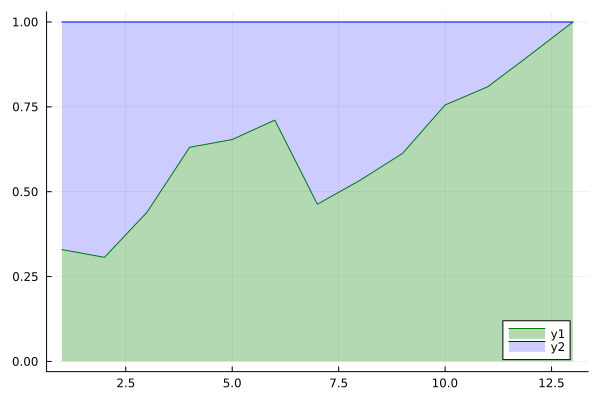

In [203]:
stocks_weight = stocks ./wealth

stocks_weight[:,end] .= 0

stocks_weight_perc = zeros(5,n_stages)

for t in 1:n_stages
    stocks_weight_perc[:,t] = quantile(stocks_weight[:,t], [0.05, 0.25, 0.5, 0.75, 0.95])
end

display(DataFrame(stocks_weight_perc, :auto))


bonds_weight_perc = 1 .- stocks_weight_perc

areaplot(1:n_stages, [bonds_weight_perc[3,1:n_stages] stocks_weight_perc[3,1:n_stages]], seriescolor = [:green :blue], fillalpha = [0.3 0.2], zticks=1:1:n_stages)

In [204]:
consumption_perc = zeros(5,n_stages)

for t in 1:n_stages
    consumption_perc[:,t] = quantile(consumption[:,t], [0.05, 0.25, 0.5, 0.75, 0.95])
end

DataFrame(consumption_perc, :auto) 

Row,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,9.0,9.0,9.0,9.0,9.0,9.0,78.037,9.0,9.0,9.0,9.0,9.0,89.9405
2,9.0,9.0,9.0,9.0,9.0,9.0,109.0,9.0,9.0,9.0,9.0,9.0,142.415
3,9.0,9.0,9.0,9.0,9.0,9.0,109.0,9.0,9.0,9.0,9.0,9.0,159.0
4,9.0,9.0,9.0,9.0,9.0,9.0,109.0,9.0,9.0,9.0,9.0,9.0,159.003
5,9.0,9.0,9.0,9.0,9.0,9.0,109.0,9.0,9.0,9.0,9.0,9.0,174.366


In [205]:
minimum_limit = model_data.minimum_limit
acceptable_limit = model_data.acceptable_limit
desired_limit = model_data.desired_limit
limits = [minimum_limit, acceptable_limit, desired_limit]

goals_succes = zeros(n_stages,3)

for goal in 1:3
    goals_succes[:,goal] = [count(c -> (round(c,digits=1) >= limits[goal][t]), consumption[:,t]) /n_scenarios for t in 1:n_stages]
end

DataFrame(goals_succes, ["above minimum","above acceptable","above_desired"])

Row,above minimum,above acceptable,above_desired
,Float64,Float64,Float64
1,1.0,1.0,1.0
2,1.0,1.0,1.0
3,1.0,1.0,1.0
4,1.0,1.0,1.0
5,1.0,1.0,0.9925
6,1.0,1.0,0.9885
7,0.9995,0.9145,0.818
8,1.0,0.9995,0.9915
9,1.0,0.9995,0.984


In [206]:
total_consumption = sum(consumption,dims=2)

total_consumption_perc = [quantile(total_consumption,[0.05, 0.25, 0.5, 0.75, 0.95])]


1-element Vector{Vector{Float64}}:
 [282.5844477869656, 342.9444532665633, 367.00000000009726, 367.00231047843795, 381.2404173751981]

# Need Help?

* Learning: https://julialang.org/learning/
* Documentation: https://docs.julialang.org/
* Questions & Discussions:
  * https://discourse.julialang.org/
  * http://julialang.slack.com/
  * https://stackoverflow.com/questions/tagged/julia

If you ever ask for help or file an issue about Julia, you should generally provide the output of `versioninfo()`.

Add new code cells by clicking the `+ Code` button (or _Insert_ > _Code cell_).

Have fun!

<img src="https://raw.githubusercontent.com/JuliaLang/julia-logo-graphics/master/images/julia-logo-mask.png" height="100" />